# Clustering analysis on 10k PBMC data

In [1]:
from keras.utils.vis_utils import model_to_dot

# import tensorflow as tf
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import os, sys

sys.path.append('../src')

from imp import load_source
from models import *

tf.enable_eager_execution()

Using TensorFlow backend.
W0911 18:18:33.231014 4463617472 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

## Adversarial Autoencoder: Basic Architecture

<img src="img/adversarial_autoencoder_model.png" width="800px" style="float:center" >

### Build the model

In [ ]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'layers_dis_dim': [200, 100, 50, 30],
    'batch_size': 35,
    'epochs': 5 #200
}

In [ ]:
model = AAE1(**parameters)

In [ ]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

In [ ]:
# Rescale gene expression data

model.rescale_data()

In [ ]:
# Build the full model

model.build_model()

In [ ]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

In [ ]:
# Model summary

model.get_summary()

In [ ]:
# Export model graphs

log_dir = '../results/AAE1/PBMC10k/'
os.makedirs(log_dir + 'graphs', exist_ok=True)
model.export_graph('../results/AAE1/PBMC10k/graphs')

### Visualize graphs

[ENCODER](../results/AAE1/PBMC10k/graphs/encoder.png)

[DECODER](../results/AAE1/PBMC10k/graphs/decoder.png)

[DISCRIMINATOR](../results/AAE1/PBMC10k/graphs/discriminator.png)

[AUTOENCODER](../results/AAE1/PBMC10k/graphs/autoencoder.png)

### Train the model

In [ ]:
# graph=True to show the data points in the 2-D latent space

log_dir = '../results/AAE1/PBMC10k/'
os.makedirs(log_dir, exist_ok=True)

GENE = 'CST3' # used only for training visualization 

rec_loss, dis_loss = model.train(graph=True, gene=GENE, log_dir=log_dir)

!tensorboard --logdir=../results/AAE1/PBMC10k/

In [ ]:
# Plot training loss values
steps = int(len(model.data)/model.batch_size)

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss[::steps])
plt.plot(dis_loss[::steps])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Discriminator'], loc='upper right')
plt.show()

In [ ]:
GENE_LIST = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

log_dir = '../results/AAE1/PBMC10k/'
model.encoder = load_model(log_dir + 'models/encoder.h5')

labels_true = model.labels

model.update_labels(res=0.6)
labels_pred = model.labels

GENE_LIST = ['CST3']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

print("ARI = {}".format(adjusted_rand_score(labels_true, labels_pred)))
print("AMI = {}".format(adjusted_mutual_info_score(labels_true, labels_pred)))

## Unsupervised Adversarial Autoencoder: Setting Number of Clusters

### Build the model

In [ ]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'num_clusters': 18,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'layers_dis_dim': [200, 100, 50, 30],
    'layers_dis_cat_dim': [200, 100, 50, 30],
    'batch_size': 35,
    'epochs': 5, #200,
    'tau': 0.05 # temperature parameter
}

In [ ]:
model = AAE2(**parameters)

In [ ]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

In [ ]:
# Rescale gene expression data

model.rescale_data()

In [ ]:
# Build the full model

model.build_model()

In [ ]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

In [ ]:
# Model summary

model.get_summary()

In [ ]:
# Export model graphs

log_dir = '../results/AAE2/PBMC10k/'
os.makedirs(log_dir + 'graphs', exist_ok=True)
model.export_graph('../results/AAE2/PBMC10k/graphs')

### Visualize graphs

[ENCODER](../results/AAE2/PBMC10k/graphs/encoder.png)

[DECODER](../results/AAE2/PBMC10k/graphs/decoder.png)

[DISCRIMINATOR](../results/AAE2/PBMC10k/graphs/discriminator.png)

[AUTOENCODER](../results/AAE2/PBMC10k/graphs/autoencoder.png)

### Train the model


In [ ]:
# graph=True to show the data points in the 2-D latent space

log_dir = '../results/AAE2/PBMC10k/'
os.makedirs(log_dir, exist_ok=True)

GENE = 'CST3' # used only for training visualization 

rec_loss, dis_loss, dis_cat_loss = model.train(graph=True, gene=GENE, log_dir=log_dir)

In [ ]:
#!tensorboard --logdir=../results/AAE5/PBMC10k/

In [ ]:
# Plot training loss values
steps = int(len(model.data)/model.batch_size)


plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss[::steps])
plt.plot(dis_loss[::steps])
plt.plot(dis_cat_loss[::steps])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Reconstruction', 'Discriminator', 'Cat. Discriminator'], 
           loc='upper right')
plt.show()

In [ ]:
GENE_LIST = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

# BUG: currently loading a model with multiple outpus generates an AttributeError
# log_dir = '../results/AAE2/PBMC10k/'
# model.encoder = load_model(log_dir + 'models/encoder.h5')

labels_true = model.labels

model.update_labels(res=0.6)
labels_pred = model.labels

GENE_LIST = ['CST3']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

print("ARI = {}".format(adjusted_rand_score(labels_true, labels_pred)))
print("AMI = {}".format(adjusted_mutual_info_score(labels_true, labels_pred)))

## Variational Autoencoder

<img src="img/variational_autoencoder_model.png" width="800px" style="float:center">

### Build the model

In [4]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'batch_size': 35,
    'epochs': 500
}

In [5]:
model = VAE(**parameters)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Dataset rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


,Value,Description
batch_size,35,batch size
epochs,500,number of epochs
alpha,0.1,alpha coeff. in activation function
do_rate,0.1,dropout rate
kernel_initializer,glorot_uniform,kernel initializer of all dense layers
bias_initializer,zeros,bias initializer of all dense layers
l2_weight,None,weight of l2 kernel regularization
l1_weight,None,weight of l1 activity regularization
latent_dim,10,dimension of latent space Z
layer_1_enc_dim,200,dimension of encoder dense layer 1


In [9]:
# Build the full model

model.build_model()

W0911 18:18:51.285553 4463617472 training_utils.py:1346] Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.


In [10]:
# Model summary

model.get_summary()


Encoder Network
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  [(None, 1789)]       0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          358000      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
___________________________________________________________________________

In [12]:
# Export model graphs

log_dir = '../results/VAE/PBMC10k/'
os.makedirs(log_dir + 'graphs', exist_ok=True)
model.export_graph('../results/VAE/PBMC10k/graphs')

Model graphs saved.



### Visualize graphs

[ENCODER](../results/VAE/PBMC10k/graphs/encoder.png)

[DECODER](../results/VAE/PBMC10k/graphs/decoder.png)

[AUTOENCODER](../results/VAE/PBMC10k/graphs/autoencoder.png)

### Train the model

In [11]:
# Training...

log_dir = '../results/VAE/PBMC10k/'
os.makedirs(log_dir, exist_ok=True)

data_file = '../data/proc/pbmc10k.tfrecord'  # add for mode='TFRecord'

loss, val_loss = model.train(val_split=0.2, 
                             log_dir=log_dir, 
                             mode='TFRecord', 
                             data_file=data_file, 
                             num_workers=10)

Start model training...
Train for 171 steps, validate for 42 steps
Epoch 1/500
171/171 [==============================] - 6s 35ms/step - loss: 1793.2114 - val_loss: 1809.1142
Epoch 2/500
171/171 [==============================] - 2s 12ms/step - loss: 1620.0206 - val_loss: 1644.2930
Epoch 3/500
171/171 [==============================] - 2s 12ms/step - loss: 1577.8783 - val_loss: 1591.4696
Epoch 4/500
171/171 [==============================] - 2s 12ms/step - loss: 1551.4231 - val_loss: 1556.5462
Epoch 5/500
171/171 [==============================] - 2s 13ms/step - loss: 1526.9781 - val_loss: 1544.1244
Epoch 6/500
171/171 [==============================] - 2s 13ms/step - loss: 1508.8098 - val_loss: 1539.8439
Epoch 7/500
171/171 [==============================] - 2s 14ms/step - loss: 1514.7899 - val_loss: 1537.1965
Epoch 8/500
171/171 [==============================] - 2s 13ms/step - loss: 1509.3088 - val_loss: 1535.0634
Epoch 9/500
171/171 [==============================] - 2s 13ms/step -

171/171 [==============================] - 2s 14ms/step - loss: 1481.2754 - val_loss: 1511.7915
Epoch 76/500
171/171 [==============================] - 2s 13ms/step - loss: 1481.1361 - val_loss: 1511.3029
Epoch 77/500
171/171 [==============================] - 2s 14ms/step - loss: 1477.5143 - val_loss: 1511.4487
Epoch 78/500
171/171 [==============================] - 4s 22ms/step - loss: 1484.5103 - val_loss: 1511.4105
Epoch 79/500
171/171 [==============================] - 3s 18ms/step - loss: 1479.7255 - val_loss: 1511.2592
Epoch 80/500
171/171 [==============================] - 2s 12ms/step - loss: 1482.7875 - val_loss: 1511.0390
Epoch 81/500
171/171 [==============================] - 2s 13ms/step - loss: 1474.2288 - val_loss: 1510.9837
Epoch 82/500
171/171 [==============================] - 3s 16ms/step - loss: 1481.7093 - val_loss: 1510.9670
Epoch 83/500
171/171 [==============================] - 3s 16ms/step - loss: 1483.8068 - val_loss: 1510.7497
Epoch 84/500
171/171 [==========

Epoch 150/500
171/171 [==============================] - 2s 13ms/step - loss: 1471.7217 - val_loss: 1506.4441
Epoch 151/500
171/171 [==============================] - 2s 13ms/step - loss: 1476.2792 - val_loss: 1506.2392
Epoch 152/500
171/171 [==============================] - 2s 13ms/step - loss: 1471.1721 - val_loss: 1506.6204
Epoch 153/500
171/171 [==============================] - 2s 13ms/step - loss: 1476.7176 - val_loss: 1506.5710
Epoch 154/500
171/171 [==============================] - 2s 13ms/step - loss: 1473.5771 - val_loss: 1506.3750
Epoch 155/500
171/171 [==============================] - 2s 14ms/step - loss: 1470.3638 - val_loss: 1506.5614
Epoch 156/500
171/171 [==============================] - 2s 13ms/step - loss: 1471.7193 - val_loss: 1506.2435
Epoch 157/500
171/171 [==============================] - 2s 12ms/step - loss: 1470.6278 - val_loss: 1506.1869
Epoch 158/500
171/171 [==============================] - 2s 13ms/step - loss: 1477.4783 - val_loss: 1506.2944
Epoch 159/

171/171 [==============================] - 2s 12ms/step - loss: 1462.6063 - val_loss: 1505.4490
Epoch 225/500
171/171 [==============================] - 2s 13ms/step - loss: 1476.8841 - val_loss: 1505.4964
Epoch 226/500
171/171 [==============================] - 2s 12ms/step - loss: 1470.2684 - val_loss: 1505.2111
Epoch 227/500
171/171 [==============================] - 2s 13ms/step - loss: 1475.5432 - val_loss: 1505.2681
Epoch 228/500
171/171 [==============================] - 2s 13ms/step - loss: 1458.8118 - val_loss: 1505.2792
Epoch 229/500
171/171 [==============================] - 2s 13ms/step - loss: 1474.3167 - val_loss: 1505.2897
Epoch 230/500
171/171 [==============================] - 2s 13ms/step - loss: 1472.0768 - val_loss: 1505.3653
Epoch 231/500
171/171 [==============================] - 2s 13ms/step - loss: 1468.7938 - val_loss: 1505.3761
Epoch 232/500
171/171 [==============================] - 2s 13ms/step - loss: 1466.4759 - val_loss: 1505.5057
Epoch 233/500
171/171 [=

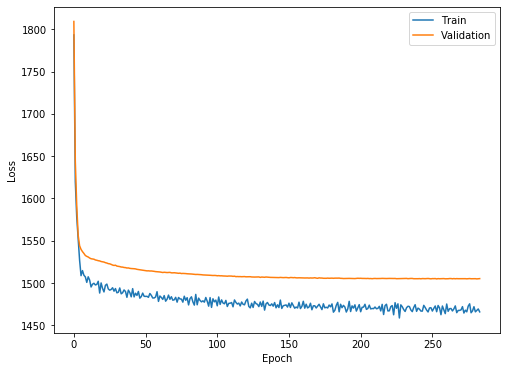

In [12]:
# Plot training & validation loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

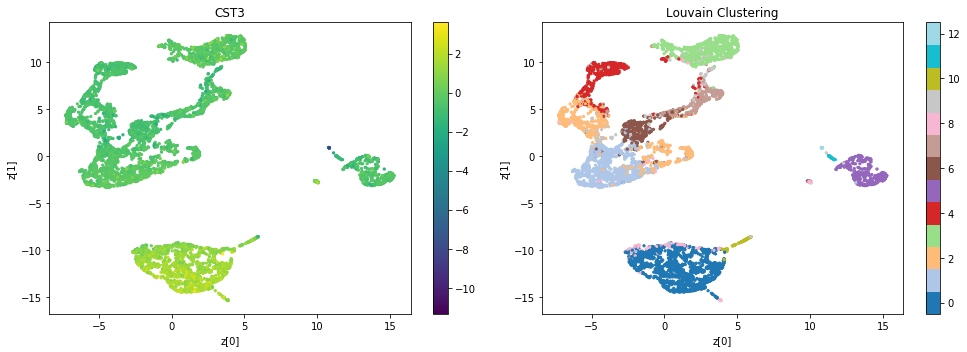

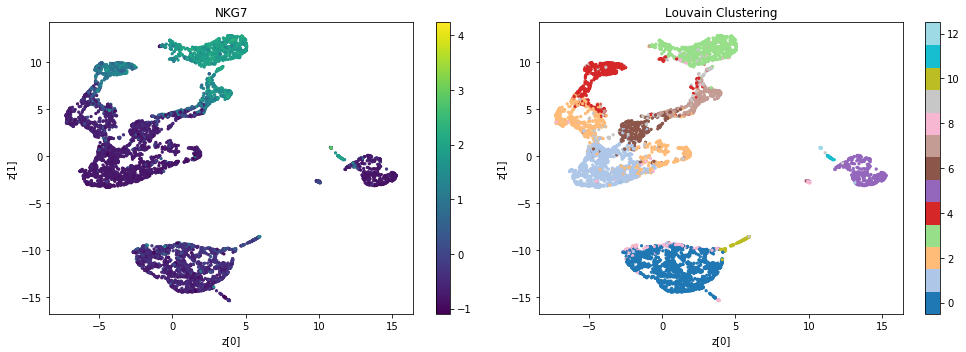

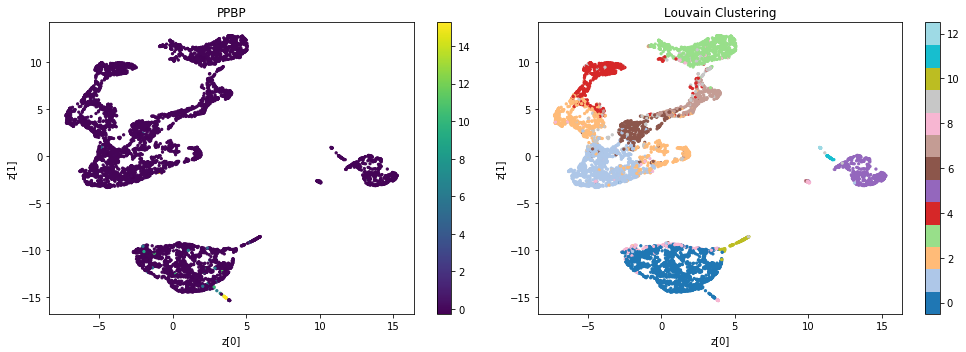

In [13]:
gene_list = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=gene_list, louvain=True)

W0911 19:01:30.256279 4463617472 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


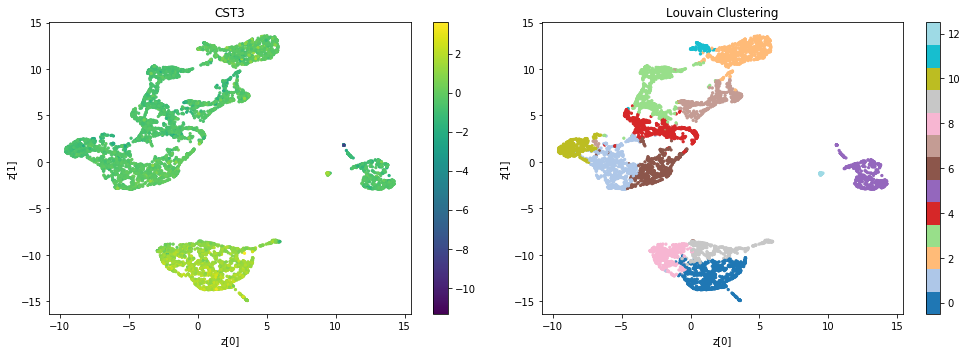

In [16]:
from tensorflow.keras.models import load_model

log_dir = '../results/VAE/PBMC10k/'
model.encoder = load_model(log_dir + 'models/encoder.h5')

model.update_labels(res=0.4)

GENE_LIST = ['CST3']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)